
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./great_cell_LIE.ipynb" download="great_cell_LIE.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=great_cell_LIE.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE.py"><img src="https://img.shields.io/static/v1?label=Source:&message=great_cell_LIE.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/master?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

## A 2D GREAT cell experiment benchmark simulated using the LIE and the B-bar methods

This benchmark is based on the SAFENET task of the DECOVALEX 2027 project, which aims to better understand fracture nucleation and evolution processes in crystalline rocks with applications in nuclear waste management and geothermal reservoir engineering, and it simulates a 2D ideal model of  the GREAT Cell experiment [1][2].

As shown in the figure below, paired loading conditions are applied to the paired boundary segments (denoted as PEE and DSS) of a cross section of the experiment sample, enabling a momentum balance.

<img src="./figures/greatcell_loading_schematic_xy.png" alt="Schematic view of Great Cell BC." style="width:400px;">
Schematic of 2D GREAT Cell benchmark (Courstey of Mostafa Mollaali).


The load conditions or the pressure applied on the segment `PEE`s are given in the table below:
| PEE 1\&1a | PEE 2\&2a | PEE 3\&3a | PEE 4\&4a | PEE 5\&5a | PEE 6\&6a | PEE 7\&7a | PEE 8\&8a |
| :-------- | :-------- | :-------- | :-------- | :-------- | :-------- | :-------- | :-------- |
| 7.73 MPa | 5.7 MPa | 4.39 MPa | 2.4 MPa | 2.3 MPa | 4.0 MPa | 6.4 MPa | 7.7 MPa|

The load condition of each `DSS` is the average of the values of its two PEE neighbours. Rigid movement is avoided by fixing the displacement at the bottom point.

An existing fracture is assumed along the $x$ axis.

The material properties of the sample are given in the following table:

| Parameter              |      Value      |    Unit |
| :--------------------- | :-------------: | ------: |
| Young's modulus        |      3.85       |     GPa |
| Poisson ratio          |      0.4        |  -      |
| Biot's constant        |     0.005       |  -      |
| Intrinsic permeability |     2.58$\cdot 10^{-19}$        | m$^2$ |
| Porosity               |     $10^{-3}$   |  -  |
| Specific storage       |     0.0   |  Pa$^{-1}$  |

For the strip portion (in the blue-colored area in the figure above), only the Young's modulus is reduced to 0.1 GPa.

As for the fracture, the cubic law is applied to the intrinsic permeability. The other fracture material models are listed in the following table:
| Parameter              |      Value      |    Unit |
| :--------------------- | :-------------: | ------: |
| Stiffness ($k_{nn}, k_{tt}$) |      (10, 4)   |     GPa |
| Biot's constant        |     1.0       |  -      |
| Intrinsic permeability |     Cubic law       | m$^2$ |
| Specific storage       |    $10^{-11}$   |  Pa$^{-1}$ |

For the HM coupled simulation, the viscosity is $10^{-3}$ Pa$\cdot$s.

The initial stresses in the sample are $\sigma_{xx}$ = $\sigma_{yy}$ = $\sigma_{zz}$ =-3 MPa,
$\sigma_{xy}$ =0 MPa, while in the fracture are $\sigma_{nn}=0$ MPa and $\sigma_{tt}=-2$ MPa.

This benchmark uses the LIE and the B-bar methods.

## Reference

1. McDermott, C.I., Fraser-Harris, A., Sauter, M., Couples, G.D., Edlmann, K., Kolditz, O., Lightbody, A., Somerville, J. and Wang, W., 2018. New experimental equipment recreating geo-reservoir conditions in large, fractured, porous samples to investigate coupled thermal, hydraulic and polyaxial stress processes. *Scientific reports*, 8(1), p.14549.

2. Mollaali, M., Kolditz, O., Hu, M., Park, C.H., Park, J.W., McDermott, C.I., Chittenden, N., Bond, A., Yoon, J.S., Zhou, J. and Pan, P.Z., Liu H., Hou W.,  Lei H., Zhang L., Nagel T., Barsch M., Wang W., Nguyen S., Kwon S. and Yoshioka K., 2023. Comparative verification of hydro-mechanical fracture behavior: Task G of international research project DECOVALEX–2023. *International Journal of Rock Mechanics and Mining Sciences*, 170, p.105530.

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot

ot.plot.setup.show_region_bounds = False

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

## Run the model with and without the B-bar method

In [2]:
project_file = Path("point_injection_embedded_fracture_F.prj")

for b_bar in ["false", "true"]:
    prj = ot.Project(
        input_file=project_file, output_file=Path(out_dir, f"b-bar_{b_bar}.prj")
    )
    prj.replace_text("hm_lie_bbar_" + b_bar, xpath="./time_loop/output/prefix")
    prj.replace_text(b_bar, xpath="./processes/process/use_b_bar")
    prj.write_input()
    prj.run_model(logfile=Path(out_dir, "out.txt"), args=f"-o {out_dir} -m .")

OGS finished with project file /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE/b-bar_false.prj.
Execution took 9.990889549255371 s
Project file written to output.


OGS finished with project file /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE/b-bar_true.prj.
Execution took 10.294776916503906 s
Project file written to output.


## Compare the volume strains obtained with and without the B-bar method

The figure below shows that the B-bar method improves the strain result significantly.

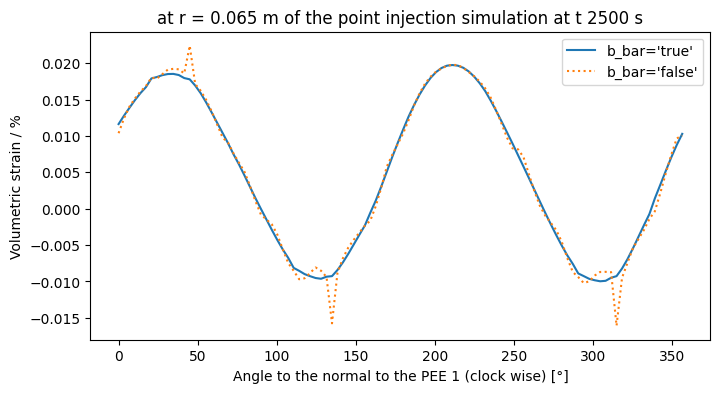

In [3]:
def inner_mesh(filename: str) -> ot.Mesh:
    "Return submesh inside a radius of 0.065."
    mesh = ot.MeshSeries(Path(out_dir, filename))[-1]
    radii = np.asarray([np.linalg.norm(cell.center) for cell in mesh.cell])
    return ot.Mesh(mesh.extract_cells(radii < 0.065))


def sorted_angles_eps_trace(filename: str) -> tuple[np.ndarray, np.ndarray]:
    "Return tangentially sorted strain traces at a radius of 0.065."
    edge = inner_mesh(filename).extract_feature_edges()
    # this also does a unitconversion from unitless to %
    eps_trace = ot.variables.strain.trace.transform(edge)
    phi = np.arctan2(edge.points[:, 1], edge.points[:, 0]) * 180 / np.pi
    phi[phi < 0] += 360
    sort_idx = np.argsort(phi)
    return (phi[sort_idx], eps_trace[sort_idx])


fig, ax = plt.subplots(figsize=[8, 4])
for b_bar in ["true", "false"]:
    angles, eps_v = sorted_angles_eps_trace("hm_lie_bbar_" + b_bar + ".pvd")
    linestyle = {"false": "dotted", "true": "solid"}[b_bar]
    ax.plot(angles, eps_v, linestyle=linestyle, label=f"{b_bar=}")
ax.set_title("at r = 0.065 m of the point injection simulation at t 2500 s")
plt.xlabel("Angle to the normal to the PEE 1 (clock wise) [°]")
plt.ylabel("Volumetric strain / %")
plt.legend()
# plt.savefig("ufz_HM1_point_injection_volume_strain_at_r0.06.png")
plt.show()

## Results over the entire domain

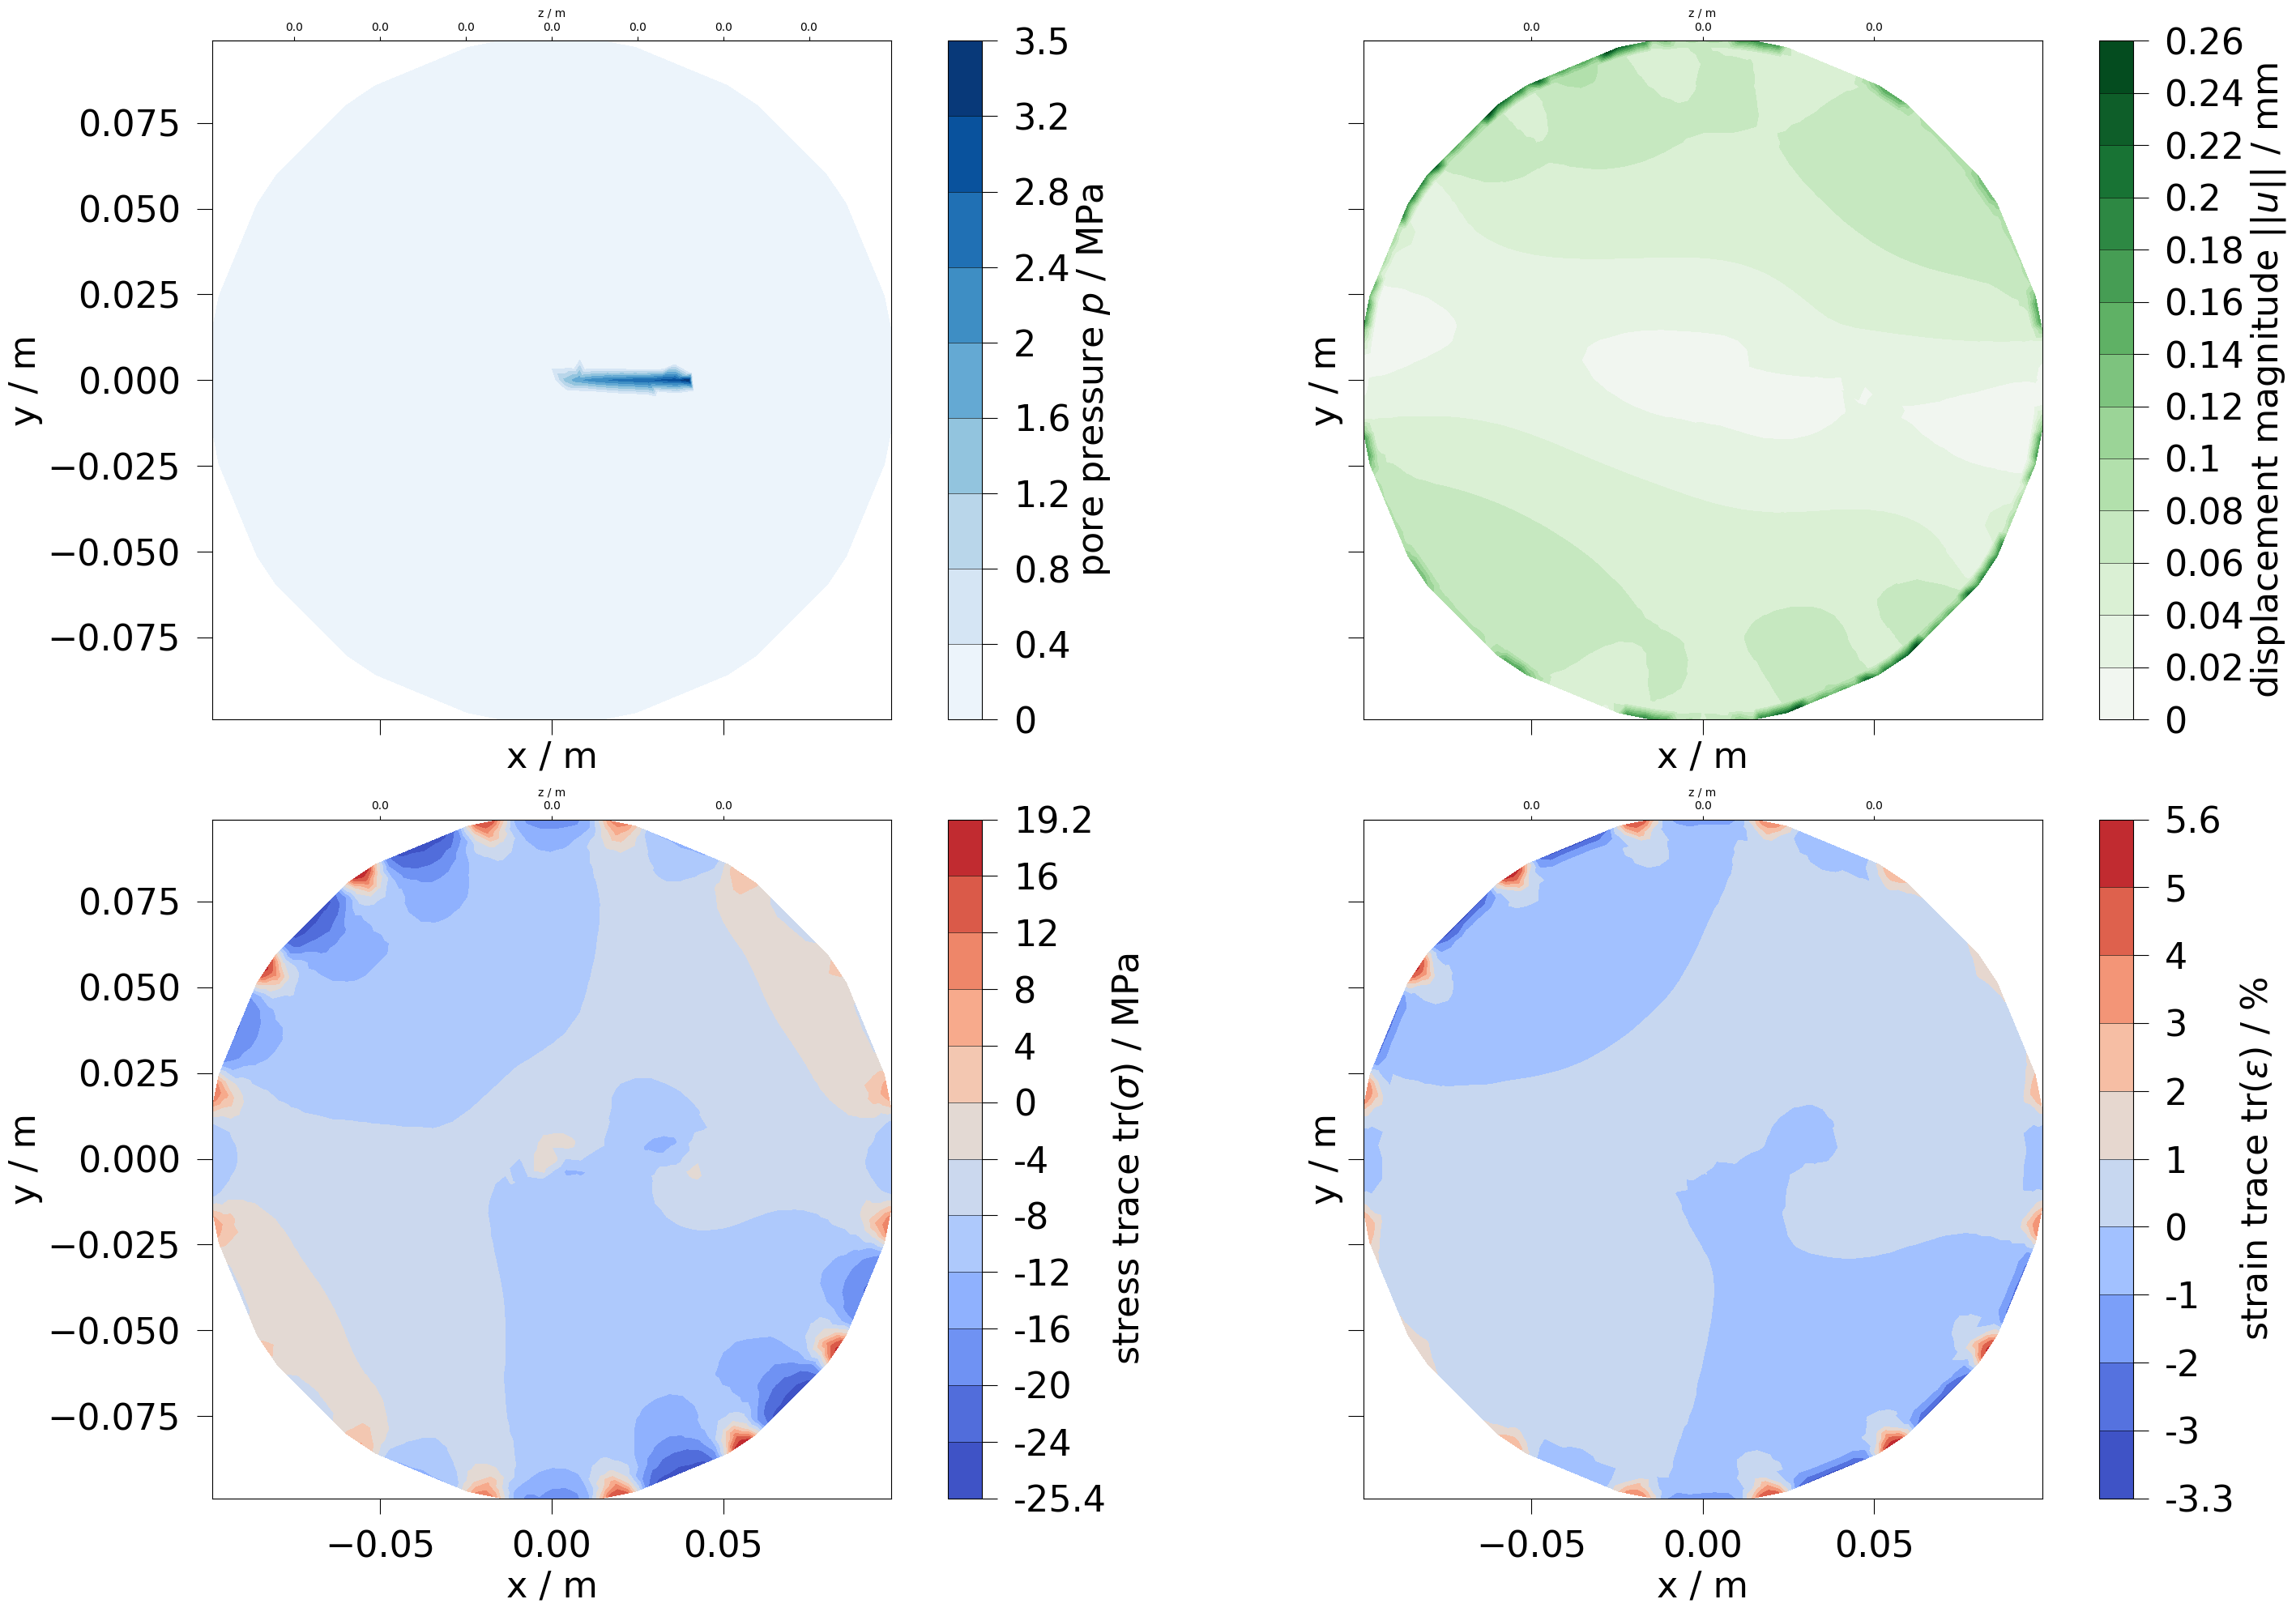

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[30, 20], sharex=True, sharey=True)
displacement = ot.variables.displacement.replace(output_unit="mm")
mesh = ot.MeshSeries(Path(out_dir, "hm_lie_bbar_true.pvd"))[-1]
mesh.plot_contourf(ot.variables.pressure, fig, axs[0, 0])
mesh.plot_contourf(displacement, fig, axs[0, 1])
mesh.plot_contourf(ot.variables.stress.trace, fig, axs[1, 0])
mesh.plot_contourf(ot.variables.strain.trace, fig, axs[1, 1])
fig.tight_layout()

## Results within a circle of $r<=$0.065 m

This highlights changes in the vicinity of fracture.

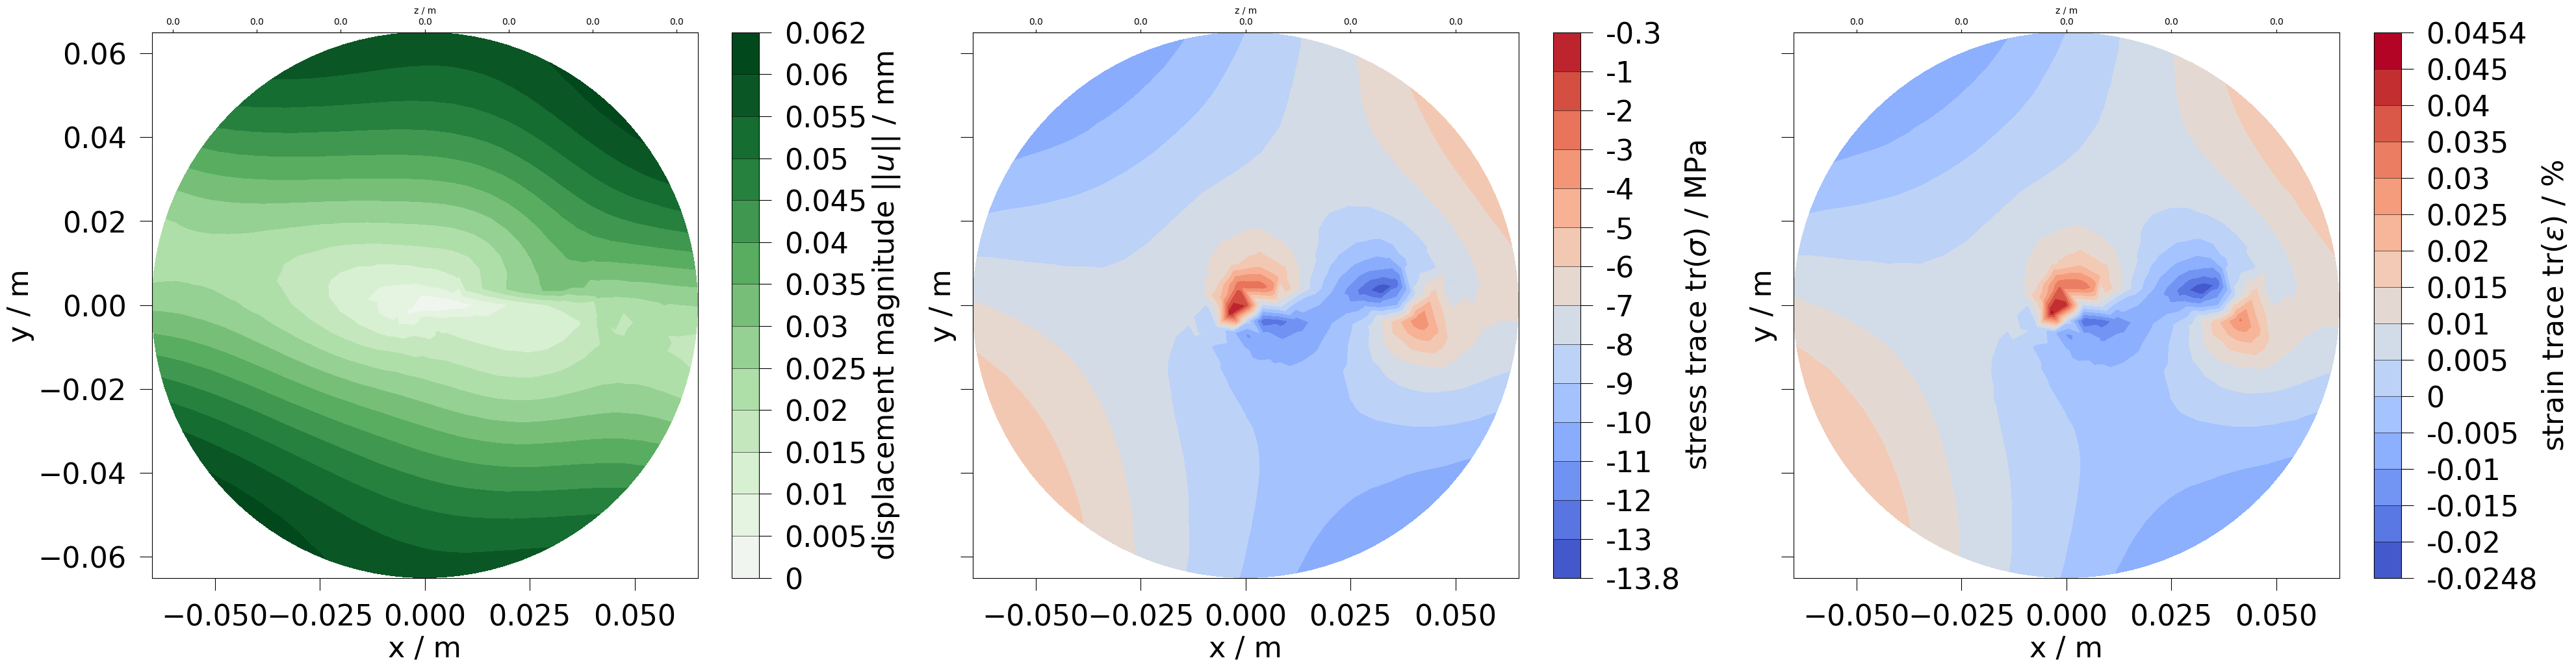

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[40, 10], sharey=True)
mesh = inner_mesh("hm_lie_bbar_true.pvd")
mesh.plot_contourf(displacement, fig, axs[0])
mesh.plot_contourf(ot.variables.stress.trace, fig, axs[1])
mesh.plot_contourf(ot.variables.strain.trace, fig, axs[2])
fig.tight_layout()

Check the the volumetric strain at the specified circle against reference
results.

In [6]:
expected_eps_v_bbar = np.array(
    [
        1.16335759e-02, 1.27973166e-02, 1.38837125e-02, 1.49406935e-02,
        1.58911804e-02, 1.67097558e-02, 1.79090654e-02, 1.80998160e-02,
        1.83571467e-02, 1.85088157e-02, 1.85298417e-02, 1.83743323e-02,
        1.79559685e-02, 1.77823124e-02, 1.69285340e-02, 1.58809634e-02,
        1.46132589e-02, 1.32426076e-02, 1.18260099e-02, 1.04200550e-02,
        9.00669579e-03, 7.48560170e-03, 6.09281828e-03, 4.58225558e-03,
        3.02608126e-03, 1.46828752e-03, -6.53200135e-06, -1.44661280e-03,
        -2.89649675e-03, -4.28481973e-03, -5.58959887e-03, -6.75842675e-03,
        -8.13201602e-03, -8.53576417e-03, -8.98598843e-03, -9.27046572e-03,
        -9.52159031e-03, -9.62522997e-03, -9.34095126e-03, -9.26342277e-03,
        -8.42189512e-03, -7.36674808e-03, -6.16629574e-03, -4.87917552e-03,
        -3.57839890e-03, -2.31545708e-03, -5.51570610e-04, 1.12625451e-03,
        3.04753264e-03, 5.06382581e-03, 7.08909206e-03, 9.02398991e-03,
        1.08850194e-02, 1.26692165e-02, 1.42565666e-02, 1.56895763e-02,
        1.69267995e-02, 1.79639671e-02, 1.87669304e-02, 1.93339451e-02,
        1.96577904e-02, 1.97482336e-02, 1.96604188e-02, 1.93682271e-02,
        1.88620312e-02, 1.81381029e-02, 1.72382726e-02, 1.61626061e-02,
        1.48629371e-02, 1.34537579e-02, 1.19775201e-02, 1.04703485e-02,
        8.94327916e-03, 7.35543718e-03, 5.77951985e-03, 4.18858899e-03,
        2.58258442e-03, 9.72674909e-04, -6.16231412e-04, -2.16070260e-03,
        -3.65785375e-03, -5.08321997e-03, -6.41058419e-03, -7.57508147e-03,
        -8.89250430e-03, -9.25773818e-03, -9.63208222e-03, -9.82829846e-03,
        -9.97005218e-03, -9.90579844e-03, -9.48959796e-03, -9.26119896e-03,
        -8.21899006e-03, -6.92310269e-03, -5.43801462e-03, -3.85970752e-03,
        -2.27052663e-03, -7.32999995e-04, 1.42009461e-03, 3.30283996e-03,
        5.20950635e-03, 7.05415028e-03, 8.76076018e-03, 1.02890497e-02
    ]
)  # fmt: skip
eps_v_bbar = sorted_angles_eps_trace("hm_lie_bbar_true.pvd")[1]
np.testing.assert_allclose(actual=eps_v_bbar, desired=expected_eps_v_bbar, atol=1e-10)